# Analysis - 2

# Seasonal Pattern of Prices

In [2]:
import pandas as pd
import numpy as np
import re
from datetime import date
import datetime
import calendar
import holidays

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import seaborn as sns

In [3]:
calendar_boston=pd.read_csv('calendar_boston.csv')
calendar_seatle=pd.read_csv('calendar_seatle.csv')

In [4]:
def get_calendarDF(calendarDF):
    #replacing NaN values with 0
    calendarDF.fillna(0, inplace=True)
    calendarDF = calendarDF[calendarDF.price != 0]

    #Extracting prices from the table
    price = calendarDF['price']
    prices=[]

    for p in price:
        p = re.sub('[^0-9.]+','', p)
        prices.append(float(p))

    #replace the price column with the new column
    calendarDF['price']=prices

    calendarDF = calendarDF[calendarDF.price >= 0]

    #separating date column into day month and year
    calendarDF['Year'],calendarDF['Month'],calendarDF['Day']=calendarDF['date'].str.split('-',2).str
    
    yearDF=calendarDF.groupby(['Year','Month']).price.mean()
    yearDF=yearDF.reset_index()
    yearDF=yearDF.rename(columns={'price':'average_Price'})
    yearDF['year-Month']=yearDF['Year'].map(str) + "-" + yearDF['Month'].map(str)
    
    #getting day name from date data and holidays
    calendarDF.fillna(0, inplace=True)
    us_holidays = holidays.US()

    calendarDF['day_Name']='default'
    calendarDF['holiday']='False'
    calendarDF['us_holidays_name']='working'
    for index,row in calendarDF.iterrows():
        sdate = datetime.date(int(row['Year']),int(row['Month']),int(row['Day']))
        vall=date(int(row['Year']),int(row['Month']),int(row['Day'])) in us_holidays
        calendarDF.at[index,'day_Name']=calendar.day_name[sdate.weekday()]
        calendarDF.at[index,'holiday']=vall
        calendarDF.at[index,'us_holidays_name']=us_holidays.get(sdate)
    
    #calculating Average price for each day

    dayDF=calendarDF.groupby('day_Name').price.mean()
    dayDF=dayDF.reset_index()
    dayDF['day_num']=0

    for index,row in dayDF.iterrows():
        if row['day_Name']=='Monday':
            dayDF.at[index,'day_num']=1
        if row['day_Name']=='Tuesday':
            dayDF.at[index,'day_num']=2
        if row['day_Name']=='Wednesday':
            dayDF.at[index,'day_num']=3
        if row['day_Name']=='Thursday':
            dayDF.at[index,'day_num']=4
        if row['day_Name']=='Friday':
            dayDF.at[index,'day_num']=5
        if row['day_Name']=='Saturday':
            dayDF.at[index,'day_num']=6
        if row['day_Name']=='Sunday':
            dayDF.at[index,'day_num']=7
    dayDF=dayDF.sort_values('day_num',ascending=[1])
    dayDF=dayDF.rename(columns={'price':'Average_Price'})
    
    #checking which holiday has maximum listings

    holidayDF=calendarDF.groupby('us_holidays_name').listing_id.count()
    holidayDF=holidayDF.reset_index()
    holidayDF=holidayDF.sort_values('listing_id',ascending=[0])
    
    holidayPriceDF=calendarDF.groupby('us_holidays_name').price.mean()
    holidayPriceDF=holidayPriceDF.reset_index()
    holidayPriceDF=holidayPriceDF.sort_values('price',ascending=[0])
                                                                 
    merger=pd.merge(holidayDF,holidayPriceDF,on='us_holidays_name')
    merger=merger.rename(columns={'listing_id':'number_Of_Listings'})
    merger=merger.rename(columns={'price':'average_Price'})
  
    return calendarDF,yearDF,dayDF,holidayDF,holidayPriceDF,merger

In [5]:
# visualizing the trend of year/Month and average prices of the listing
def plot_yearDF(yearDF):
    objects = yearDF['year-Month']
    y_pos = yearDF['average_Price']

    yearDF.plot(kind='bar', 
               x='year-Month',
               y='average_Price',
               color = '#66c2ff', 
               figsize =(8,4), 
               title = 'Airbnb prices trend over months', 
               legend = False)
    plt.ylabel('Average Price')


In [6]:
def plot_holidayDF(holidayDF):
    plt.figure(figsize=(19,8))
    ax = sns.barplot("us_holidays_name", y="listing_id", data=holidayDF,palette="Blues_d")
    ax.set(xlabel='US Holidays Name', ylabel='Total Number of Listings')

In [7]:
def plot_holidayPriceDF(holidayPriceDF):
    plt.figure(figsize=(19,8))
    ax = sns.barplot("us_holidays_name", y="price", data=holidayPriceDF,palette="Blues_d")
    ax.set(xlabel='US Holidays Name', ylabel='Average Price')

In [8]:
calendarDF_boston,yearDF_boston,dayDF_boston,holidayDF_boston,holidayPriceDF_boston,merger_boston = get_calendarDF(calendar_boston)

C:\Users\leec\AppData\Local\Temp/ipykernel_2844/2355021948.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendarDF['price']=prices
C:\Users\leec\AppData\Local\Temp/ipykernel_2844/2355021948.py:20: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  calendarDF['Year'],calendarDF['Month'],calendarDF['Day']=calendarDF['date'].str.split('-',2).str


In [9]:
calendarDF_seatle,yearDF_seatle,dayDF_seatle,holidayDF_seatle,holidayPriceDF_seatle,merger_seatle = get_calendarDF(calendar_seatle)

C:\Users\leec\AppData\Local\Temp/ipykernel_2844/2355021948.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendarDF['price']=prices
C:\Users\leec\AppData\Local\Temp/ipykernel_2844/2355021948.py:20: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  calendarDF['Year'],calendarDF['Month'],calendarDF['Day']=calendarDF['date'].str.split('-',2).str


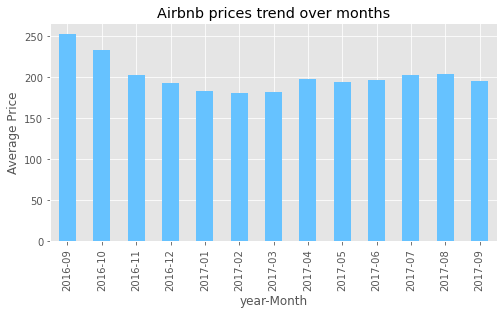

In [10]:
plot_yearDF(yearDF_boston)

It can be clearly seen that the maximum average price for listings were in the month of september and October 2016 and the reason is because of good weather and Massachussetts' best time to observe fall colors.Fall Colors in Massachusetts attracts a lot of visitors which makes September and October peak months for Airbnb hosts. 

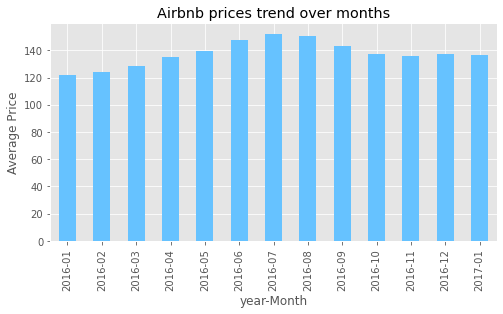

In [11]:
plot_yearDF(yearDF_seatle)

On the other hand, he maximum average price for listings were in the month of July and Aug 2016 for Seatle. It seems to me that Seatle is busy during Summer season.

To analyze the data further, I have extracted name of the day from given date and checked weather it was a holiday and what is the reason for that holiday.

In [12]:
dayDF_boston

,day_Name,Average_Price,day_num
1,Monday,195.809561,1
5,Tuesday,195.173842,2
6,Wednesday,195.418228,3
4,Thursday,198.073112,4
0,Friday,203.121167,5
2,Saturday,203.408387,6
3,Sunday,198.219764,7


<AxesSubplot:xlabel='day_num', ylabel='Average_Price'>

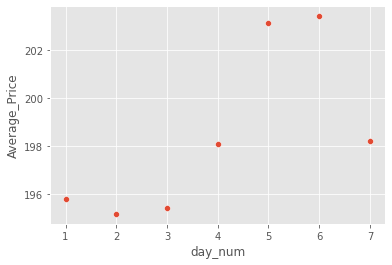

In [16]:
sns.scatterplot(x = dayDF_boston['day_num'], y = dayDF_boston['Average_Price'])

In [13]:
dayDF_seatle

,day_Name,Average_Price,day_num
1,Monday,135.676414,1
5,Tuesday,135.408764,2
6,Wednesday,135.447880,3
4,Thursday,136.476032,4
0,Friday,143.036294,5
2,Saturday,143.202136,6
3,Sunday,136.459941,7


<AxesSubplot:xlabel='day_num', ylabel='Average_Price'>

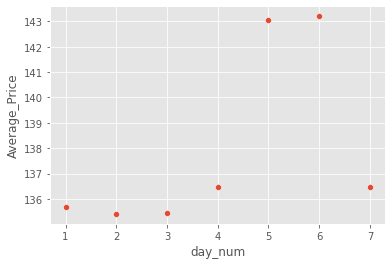

In [17]:
sns.scatterplot(x = dayDF_seatle['day_num'], y = dayDF_seatle['Average_Price'])

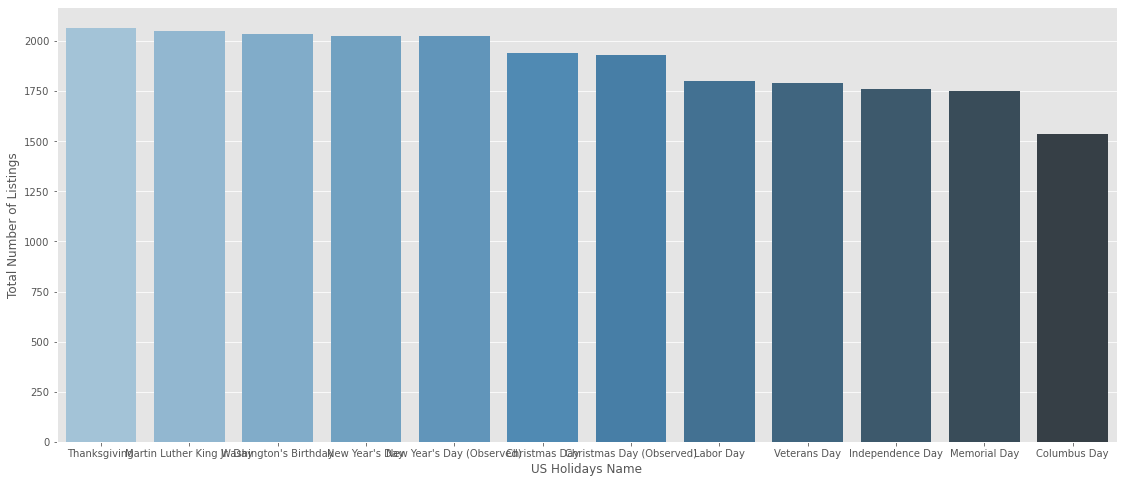

In [81]:
plot_holidayDF(holidayDF_boston)

C:\Users\leec\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


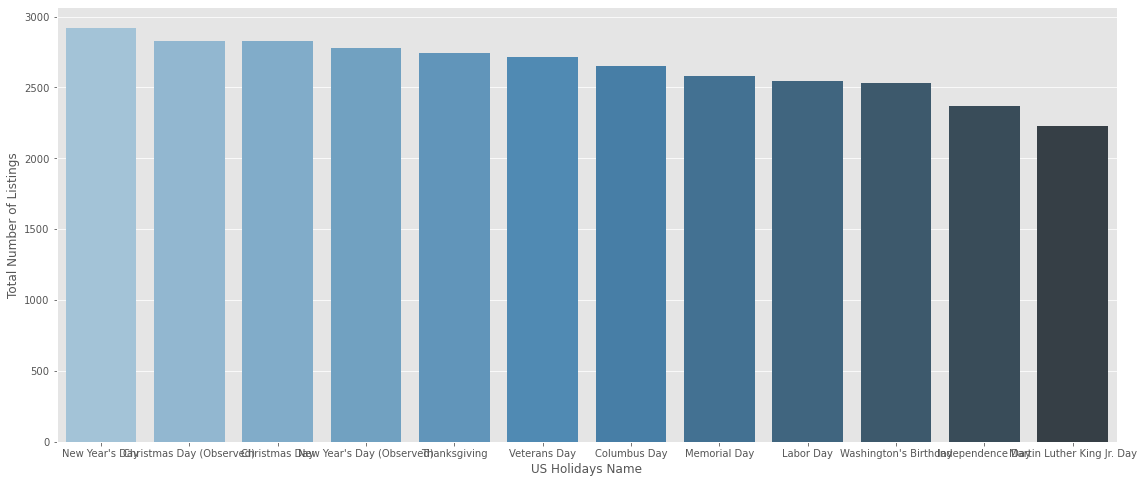

In [82]:
plot_holidayDF(holidayDF_seatle)

C:\Users\leec\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


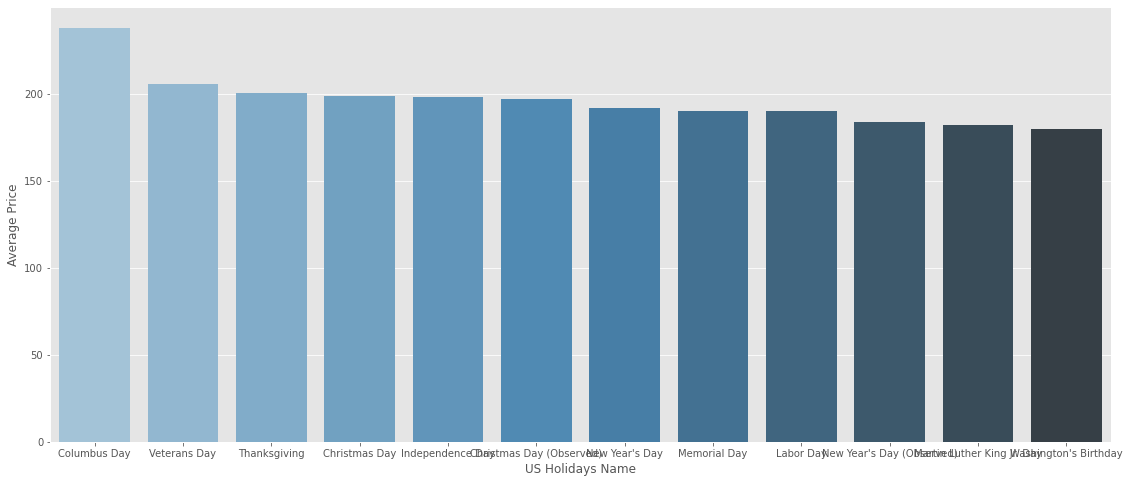

In [83]:
plot_holidayPriceDF(holidayPriceDF_boston)

In [88]:
merger_boston.sort_values('average_Price',ascending=[0])

,us_holidays_name,number_Of_Listings,average_Price
11,Columbus Day,1538,237.838101
8,Veterans Day,1793,205.283324
0,Thanksgiving,2067,200.077407
5,Christmas Day,1938,198.380805
9,Independence Day,1763,197.900737
6,Christmas Day (Observed),1932,196.901139
3,New Year's Day,2027,191.555994
10,Memorial Day,1749,190.034305
7,Labor Day,1801,189.907829
4,New Year's Day (Observed),2027,183.823384


C:\Users\leec\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


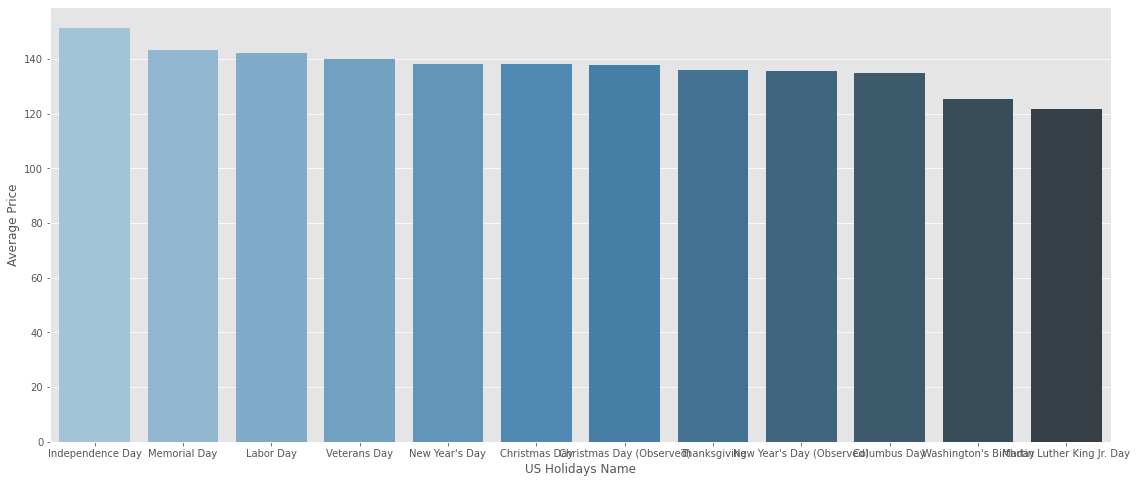

In [84]:
plot_holidayPriceDF(holidayPriceDF_seatle)

In [89]:
merger_seatle.sort_values('average_Price',ascending=[0])

,us_holidays_name,number_Of_Listings,average_Price
10,Independence Day,2371,151.402362
7,Memorial Day,2583,143.233837
8,Labor Day,2544,142.087264
5,Veterans Day,2718,140.070272
0,New Year's Day,2922,138.126968
2,Christmas Day,2829,137.974903
1,Christmas Day (Observed),2831,137.895797
4,Thanksgiving,2746,136.054989
3,New Year's Day (Observed),2776,135.572767
6,Columbus Day,2650,134.985660


In [ ]:
from datetime import date
import holidays

# Select country
us_holidays = holidays.US()

# Print all the holidays in US in year 2018
for ptr in holidays.US(years = 2016).items():
    print(ptr)

(datetime.date(2016, 1, 1), "New Year's Day")
(datetime.date(2016, 1, 18), 'Martin Luther King Jr. Day')
(datetime.date(2016, 2, 15), "Washington's Birthday")
(datetime.date(2016, 5, 30), 'Memorial Day')
(datetime.date(2016, 7, 4), 'Independence Day')
(datetime.date(2016, 9, 5), 'Labor Day')
(datetime.date(2016, 10, 10), 'Columbus Day')
(datetime.date(2016, 11, 11), 'Veterans Day')
(datetime.date(2016, 11, 24), 'Thanksgiving')
(datetime.date(2016, 12, 25), 'Christmas Day')
(datetime.date(2016, 12, 26), 'Christmas Day (Observed)')
